In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-image/test/test/benign/nonca_test_409.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_129.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_1558.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_1447.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_289.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_1204.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_920.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_782.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_642.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_796.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_777.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_355.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_1128.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_1421.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_1057.jpg
/kaggle/input/new-image/test/test/benign/nonca_test_466.jpg
/kaggle/input/new-image/test/test/

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import get_file
from sklearn.metrics import roc_curve, auc, confusion_matrix
from imblearn.metrics import sensitivity_score, specificity_score

import os
import glob
import zipfile
import random

import shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
os.mkdir("newtrain")
train = os.path.join("newtrain", "train")
valid = os.path.join("newtrain", "valid")
os.mkdir(train)
os.mkdir(valid)
train_benign = os.path.join("newtrain/train", "benign")
train_malignant = os.path.join("newtrain/train", "malignant")
valid_benign = os.path.join("newtrain/valid", "benign")
valid_malignant = os.path.join("newtrain/valid", "malignant")
os.mkdir(train_benign)
os.mkdir(train_malignant)
os.mkdir(valid_benign)
os.mkdir(valid_malignant)

In [4]:
num_test = len(os.listdir('/kaggle/input/new-image/test/test/malignant'))
num_test

265

In [5]:
os.mkdir("test")
test_benign = os.path.join('test', "benign")
test_ca = os.path.join('test', 'malignant')
os.mkdir(test_benign)
os.mkdir(test_ca)

In [6]:
name_test_ca = list(os.listdir('/kaggle/input/new-image/test/test/malignant'))
name_test_benign = list(os.listdir('/kaggle/input/new-image/test/test/benign'))

In [7]:
random.shuffle(name_test_benign)
test_benign = name_test_benign[:num_test] 

In [8]:
len(name_test_benign)

1600

In [9]:
for name_ca in name_test_ca:
    path = '/kaggle/input/new-image/test/test/malignant/'
    shutil.copy(path+name_ca, '/kaggle/working/test/malignant/')
for name_nonca in test_benign:
    path = '/kaggle/input/new-image/test/test/benign/'
    shutil.copy(path+name_nonca, '/kaggle/working/test/benign/')

In [10]:
test_ca = len(os.listdir('/kaggle/working/test/malignant/'))
test_nonca = len(os.listdir('/kaggle/working/test/benign/'))

In [11]:
name_ca = list(os.listdir('/kaggle/input/new-image/train/train/malignant'))
len(name_ca)

5040

In [12]:
valid_size = 0.1 
valid_number = int(len(name_ca) * valid_size)
random.shuffle(name_ca)
valid_set_ca = name_ca[:valid_number]
train_set_ca = name_ca[valid_number:]
name_nonca = list(os.listdir('/kaggle/input/new-image/train/train/benign'))
random.shuffle(name_nonca)
valid_set_nonca = name_nonca[:valid_number]
train_set_nonca = name_nonca[valid_number:5040]

In [13]:
print(f"valid for ca = {len(valid_set_ca)}")
print(f"valid for nonca = {len(valid_set_nonca)} ")
print(f"train for ca = {len(train_set_ca)}")
print(f"train for nonca = {len(train_set_nonca)} ")
print(f"test for ca = {test_ca}")
print(f"test for nonca = {test_nonca}")

valid for ca = 504
valid for nonca = 504 
train for ca = 4536
train for nonca = 4536 
test for ca = 265
test for nonca = 265


In [14]:

for ca in valid_set_ca:
    path = '/kaggle/input/new-image/train/train/malignant/'
    shutil.copy(path+ca, '/kaggle/working/newtrain/valid/malignant')
for ca in train_set_ca:
    path = '/kaggle/input/new-image/train/train/malignant/'
    shutil.copy(path+ca, '/kaggle/working/newtrain/train/malignant')
for nonca in valid_set_nonca:
    path = '/kaggle/input/new-image/train/train/benign/'
    shutil.copy(path+nonca, '/kaggle/working/newtrain/valid/benign')
for nonca in train_set_nonca:
    path = '/kaggle/input/new-image/train/train/benign/'
    shutil.copy(path+nonca, '/kaggle/working/newtrain/train/benign')

In [15]:
train_dir = '/kaggle/working/newtrain/train'
valid_dir = '/kaggle/working/newtrain/valid'
test_dir = '/kaggle/input/new-image/test/test/'

In [16]:
img_height = 256
img_width = 256
batch_size_16 = 16
train_ds = tf.keras.utils.image_dataset_from_directory(
          train_dir,
          image_size=(img_height, img_width),
          batch_size=batch_size_16)

valid_ds = tf.keras.utils.image_dataset_from_directory(
          valid_dir,
          image_size=(img_height, img_width),
          batch_size=batch_size_16)

Found 9072 files belonging to 2 classes.
Found 1008 files belonging to 2 classes.


In [17]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


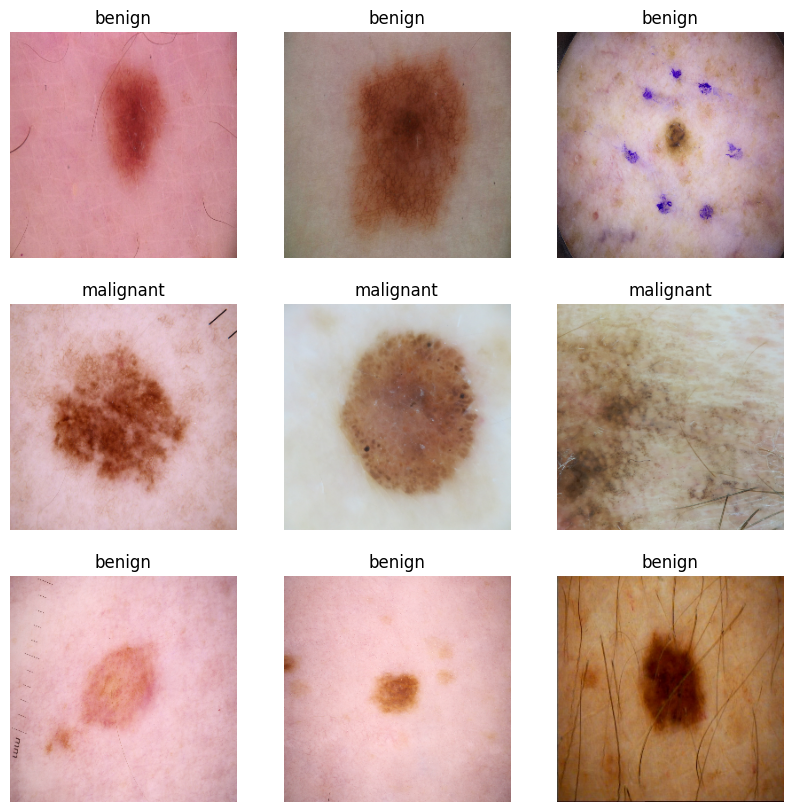

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

In [20]:
import keras
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)    
  ]
)

resize_and_rescale = tf.keras.Sequential([
    #layers.CenterCrop(CCrop,CCrop),
    #layers.Resizing(512, 512),
    layers.Rescaling(1./255.)
])

In [21]:
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [22]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

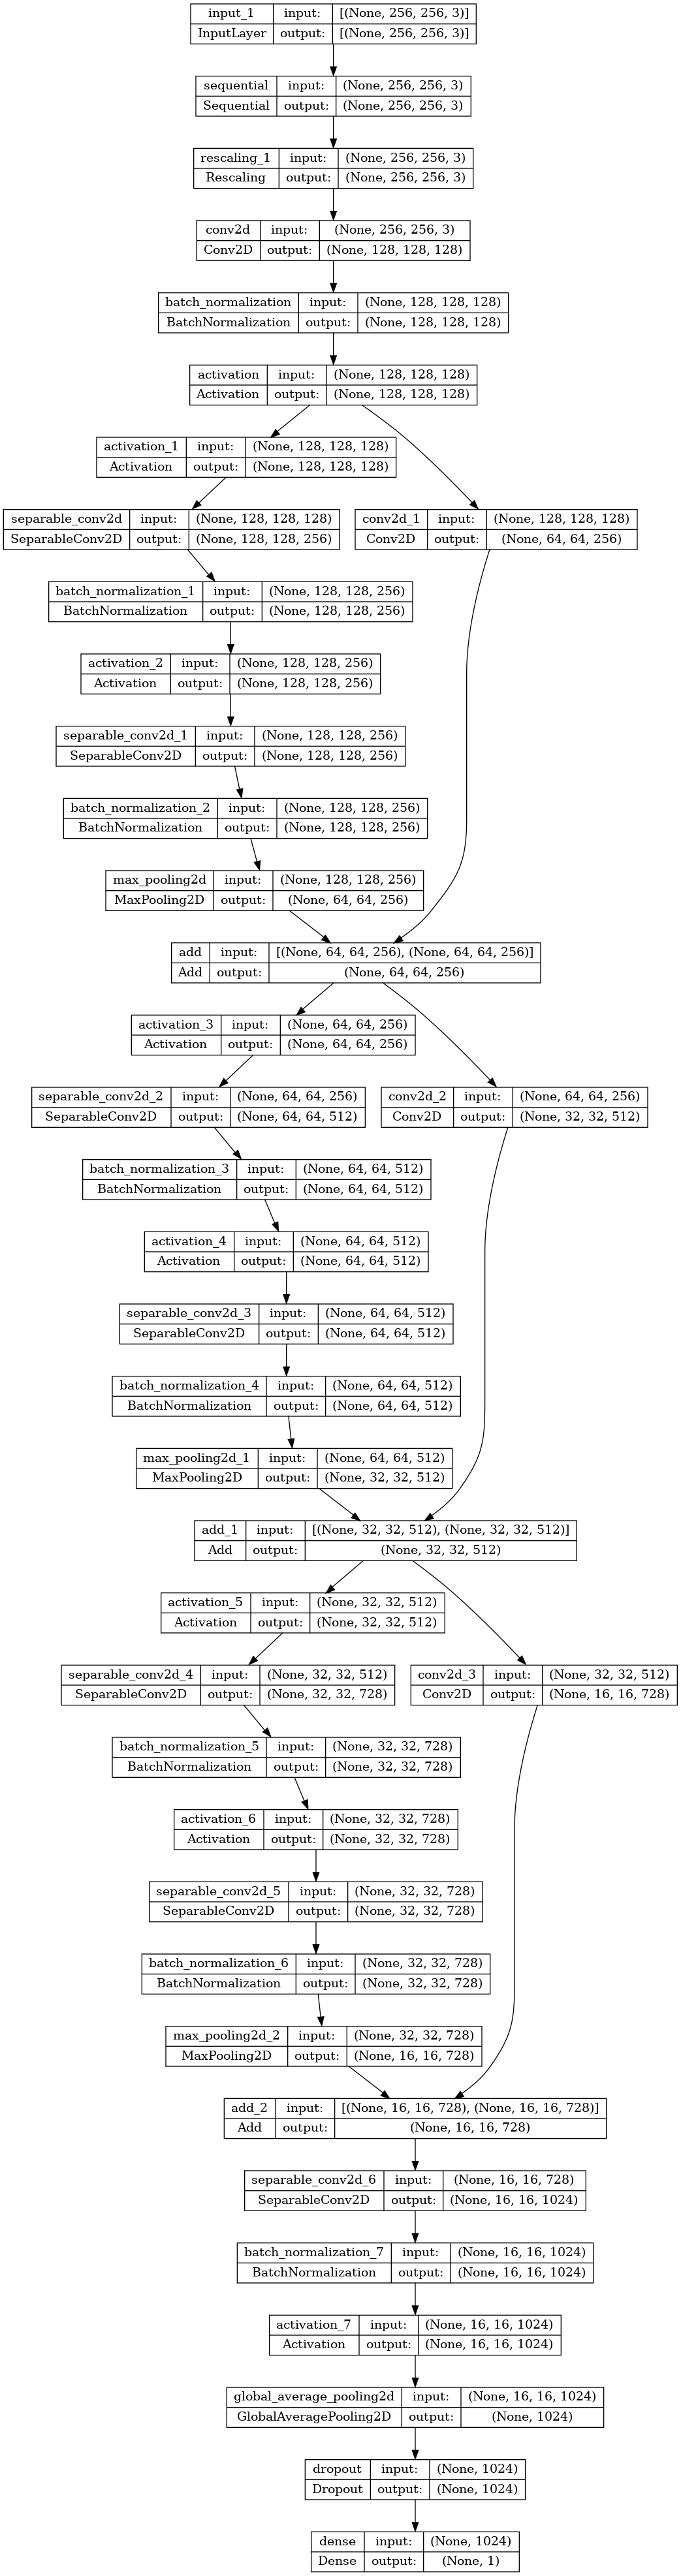

In [23]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = data_augmentation(inputs)
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=(256,256) + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [24]:
my_callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.1,patience=7, min_lr=0.000000001),
    tf.keras.callbacks.ModelCheckpoint(filepath='model_weight.h5',save_best_only=True, verbose=2),
    tf.keras.callbacks.EarlyStopping(patience=15),
    #tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    
]

In [25]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [26]:
history = model.fit(train_ds,
                    validation_data = valid_ds,
                    epochs = 50,
                    verbose=1,
                    callbacks=my_callbacks)

Epoch 1/50
567/567 [==============================] - ETA: 0s - loss: 0.4287 - accuracy: 0.8060
Epoch 1: val_loss improved from inf to 0.37059, saving model to model_weight.h5
567/567 [==============================] - 432s 736ms/step - loss: 0.4287 - accuracy: 0.8060 - val_loss: 0.3706 - val_accuracy: 0.8452 - lr: 0.0010
Epoch 2/50
567/567 [==============================] - ETA: 0s - loss: 0.3716 - accuracy: 0.8384
Epoch 2: val_loss did not improve from 0.37059
567/567 [==============================] - 427s 744ms/step - loss: 0.3716 - accuracy: 0.8384 - val_loss: 0.3712 - val_accuracy: 0.8552 - lr: 0.0010
Epoch 3/50
567/567 [==============================] - ETA: 0s - loss: 0.3280 - accuracy: 0.8595
Epoch 3: val_loss did not improve from 0.37059
567/567 [==============================] - 422s 735ms/step - loss: 0.3280 - accuracy: 0.8595 - val_loss: 0.4107 - val_accuracy: 0.8562 - lr: 0.0010
Epoch 4/50
567/567 [==============================] - ETA: 0s - loss: 0.3108 - accuracy: 0.872

In [27]:
test_dir = '/kaggle/working/test'

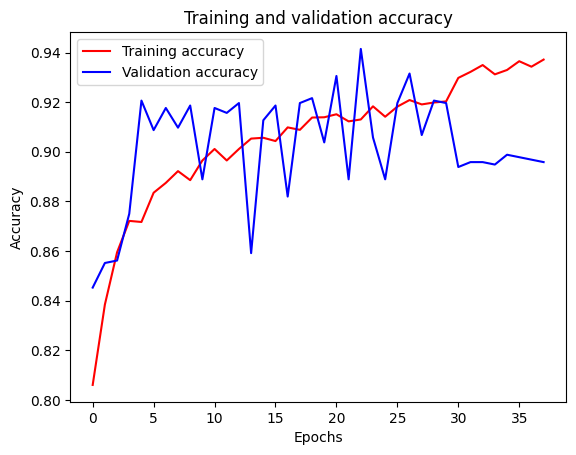

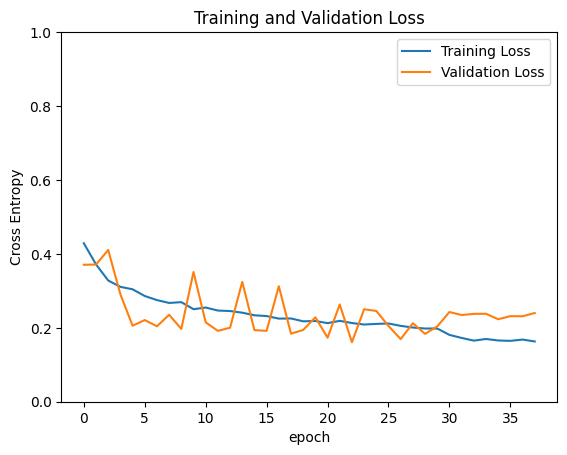

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.figure()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



plt.show()

In [29]:
test = tf.keras.utils.image_dataset_from_directory(
          test_dir,
          image_size=(img_height, img_width),
          batch_size=batch_size_16)

Found 530 files belonging to 2 classes.


In [32]:
model.save('CNN.h5')

In [31]:
model.evaluate(test)

34/34 [==============================] - 21s 466ms/step - loss: 0.2754 - accuracy: 0.8868


[0.2754007577896118, 0.8867924809455872]

In [44]:
pred = []
label = []

In [34]:
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as pl
from tensorflow.keras.utils import img_to_array

In [35]:
test_ca = os.listdir('/kaggle/working/test/malignant/')
test_nonca = os.listdir('/kaggle/working/test/benign/')

In [45]:
for name in test_ca:
    img_path = '/kaggle/working/test/malignant/' + name
    img = load_img(img_path, target_size=(256, 256))
    img_array = img_to_array(img)
    #img_array = img_array/255.
    img_batch = np.expand_dims(img_array, axis=0)   
    predic = model.predict(img_batch)
    if predic < 0.5 :
        pred.append(0)
        label.append(1)
        
    else:
        pred.append(1)
        label.append(1)
        

1/1 [==============================] - 0s 20ms/step


In [46]:
pred

[1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [47]:
label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [48]:
for name in test_nonca:
    img_path = '/kaggle/working/test/benign/' + name
    img = load_img(img_path, target_size=(256, 256))
    img_array = img_to_array(img)
    #img_array = img_array/255.
    img_batch = np.expand_dims(img_array, axis=0)   
    predic = model.predict(img_batch)
    if predic < 0.5 :
        pred.append(0)
        label.append(0)
        
    else:
        pred.append(1)
        label.append(0)

1/1 [==============================] - 0s 21ms/step


              precision    recall  f1-score   support

           0       0.79      0.99      0.88       265
           1       0.99      0.74      0.85       265

    accuracy                           0.87       530
   macro avg       0.89      0.87      0.86       530
weighted avg       0.89      0.87      0.86       530



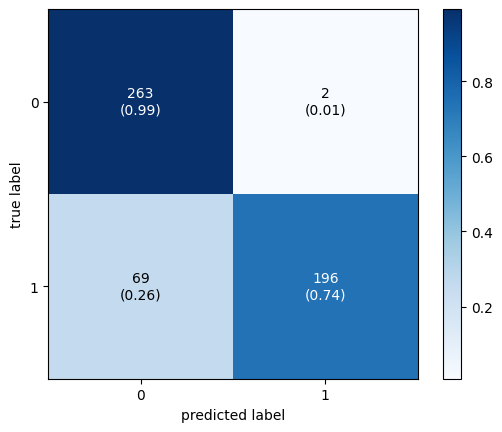

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
print(classification_report(label, pred))
cm1 = confusion_matrix(label, pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()